In [1]:
# import libraries:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc, classification_report,roc_auc_score
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import category_encoders as ce
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
import xgboost as xgb
from sklearn.metrics import f1_score, make_scorer
import joblib

# info

In [2]:
Churn = pd.read_csv('Churn_Modelling.csv')
Churn 

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [3]:
Churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [4]:
Churn.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [5]:
Churn['CreditScore'].value_counts()

850    233
678     63
655     54
705     53
667     53
      ... 
404      1
351      1
365      1
417      1
419      1
Name: CreditScore, Length: 460, dtype: int64

# splitting

In [6]:
X = Churn.drop(columns=['Surname', 'Exited'], axis= 1) # what we drop
# I also choose to drop Surname since this feature doesn't have an impact on the model
y = Churn['Exited'] # our Target Variable

In [7]:
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)
# stratify- evenly distributes the target for both test and train, keeps the ratio of the target.

In [8]:
X_train

,RowNumber,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
5866,5867,15600392,735,France,Female,53,8,123845.36,2,0,1,170454.93
1938,1939,15594902,518,France,Male,38,3,90957.81,1,0,1,162304.59
4194,4195,15660524,572,Germany,Female,54,9,97382.53,1,1,1,195771.95
6332,6333,15793046,619,France,Female,35,4,90413.12,1,1,1,20555.21
1,2,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
...,...,...,...,...,...,...,...,...,...,...,...,...
3254,3255,15778368,552,Germany,Male,50,4,121175.56,1,1,0,117505.07
4644,4645,15714240,712,Spain,Male,74,5,0.00,2,0,0,151425.82
8942,8943,15709780,667,France,Female,37,9,71786.90,2,1,1,67734.79
2935,2936,15689425,687,Spain,Male,35,8,100988.39,2,1,0,22247.27


In [9]:
X_test

,RowNumber,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
2605,2606,15620398,635,Spain,Female,34,5,98683.47,2,1,0,15733.19
9717,9718,15654222,757,Spain,Male,30,3,145396.49,1,0,1,198341.15
68,69,15638424,661,Germany,Female,35,5,150725.53,2,0,1,113656.85
9397,9398,15672467,766,France,Female,52,7,92510.90,2,0,1,66193.61
4004,4005,15738546,530,Spain,Female,41,4,0.00,2,0,1,147606.71
...,...,...,...,...,...,...,...,...,...,...,...,...
246,247,15685500,772,Germany,Male,26,7,152400.51,2,1,0,79414.00
2538,2539,15752838,723,Spain,Male,38,6,0.00,2,1,1,94415.60
5018,5019,15754577,556,France,Female,51,8,61354.14,1,1,0,198810.65
4536,4537,15756333,642,France,Female,55,7,0.00,2,1,1,101515.76


# encode

In [10]:
X_train['Gender'].value_counts() 
X_train['Gender'] = X_train.Gender.apply(lambda x: 1 if x =='Female' else 0 )
X_test['Gender'] = X_test.Gender.apply(lambda x: 1 if x =='Female' else 0 )
# here I choose to use a lambda function to encode Gender by having 1 be female and 0 being male

In [11]:
X_train['Geography'].value_counts() 
# looked at the feature Geography to decide which encoding method to use
# one hot 

France     3739
Spain      1890
Germany    1871
Name: Geography, dtype: int64

In [12]:
X_train 

,RowNumber,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
5866,5867,15600392,735,France,1,53,8,123845.36,2,0,1,170454.93
1938,1939,15594902,518,France,0,38,3,90957.81,1,0,1,162304.59
4194,4195,15660524,572,Germany,1,54,9,97382.53,1,1,1,195771.95
6332,6333,15793046,619,France,1,35,4,90413.12,1,1,1,20555.21
1,2,15647311,608,Spain,1,41,1,83807.86,1,0,1,112542.58
...,...,...,...,...,...,...,...,...,...,...,...,...
3254,3255,15778368,552,Germany,0,50,4,121175.56,1,1,0,117505.07
4644,4645,15714240,712,Spain,0,74,5,0.00,2,0,0,151425.82
8942,8943,15709780,667,France,1,37,9,71786.90,2,1,1,67734.79
2935,2936,15689425,687,Spain,0,35,8,100988.39,2,1,0,22247.27


In [13]:
# One-hot encoding
encoder = ce.OneHotEncoder(cols=['Geography'], use_cat_names=True) 
# use_cat_names=True labels them to places that where seen in the value_counts
X_train = encoder.fit_transform(X_train.copy()) # Create a copy to avoid modifying the original
X_test = encoder.transform(X_test.copy())

In [14]:
X_train.describe()
# this helps us see the statistical demographics of each and every feature

,RowNumber,CustomerId,CreditScore,Geography_France,Geography_Germany,Geography_Spain,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
count,7500.000000,7.500000e+03,7500.000000,7500.000000,7500.000000,7500.00000,7500.000000,7500.00000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000
mean,4999.702133,1.569110e+07,650.507733,0.498533,0.249467,0.25200,0.449333,38.98000,5.022800,76328.197195,1.532267,0.707200,0.516667,99540.472065
std,2899.067884,7.193933e+04,96.637724,0.500031,0.432733,0.43419,0.497459,10.55188,2.893613,62385.961630,0.581897,0.455078,0.499755,57295.127395
min,1.000000,1.556570e+07,350.000000,0.000000,0.000000,0.00000,0.000000,18.00000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000
25%,2461.750000,1.562897e+07,584.000000,0.000000,0.000000,0.00000,0.000000,32.00000,3.000000,0.000000,1.000000,0.000000,0.000000,50417.950000
50%,4999.500000,1.568999e+07,652.000000,0.000000,0.000000,0.00000,0.000000,37.00000,5.000000,96943.320000,1.000000,1.000000,1.000000,98940.675000
75%,7518.500000,1.575365e+07,717.000000,1.000000,0.000000,1.00000,1.000000,44.00000,8.000000,127785.447500,2.000000,1.000000,1.000000,148428.572500
max,10000.000000,1.581569e+07,850.000000,1.000000,1.000000,1.00000,1.000000,92.00000,10.000000,222267.630000,4.000000,1.000000,1.000000,199992.480000


In [15]:
X_test.describe()

,RowNumber,CustomerId,CreditScore,Geography_France,Geography_Germany,Geography_Spain,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
count,2500.000000,2.500000e+03,2500.000000,2500.00,2500.000000,2500.000000,2500.00000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000
mean,5002.893600,1.569047e+07,650.592000,0.51,0.255200,0.234800,0.46920,38.747200,4.982800,76958.965568,1.524000,0.700400,0.510400,101739.543328
std,2850.640959,7.193912e+04,96.719319,0.50,0.436061,0.423959,0.49915,10.293302,2.888225,62441.818502,0.580998,0.458174,0.499992,58132.152721
min,5.000000,1.556571e+07,350.000000,0.00,0.000000,0.000000,0.00000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,96.270000
25%,2592.750000,1.562763e+07,584.000000,0.00,0.000000,0.000000,0.00000,32.000000,2.000000,0.000000,1.000000,0.000000,0.000000,52466.005000
50%,5004.500000,1.569270e+07,651.500000,1.00,0.000000,0.000000,0.00000,37.000000,5.000000,98369.295000,1.000000,1.000000,1.000000,102501.625000
75%,7426.250000,1.575275e+07,719.000000,1.00,1.000000,0.000000,1.00000,44.000000,7.000000,127304.595000,2.000000,1.000000,1.000000,151938.265000
max,9999.000000,1.581563e+07,850.000000,1.00,1.000000,1.000000,1.00000,85.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199929.170000


# distribution

<AxesSubplot: xlabel='Exited', ylabel='count'>

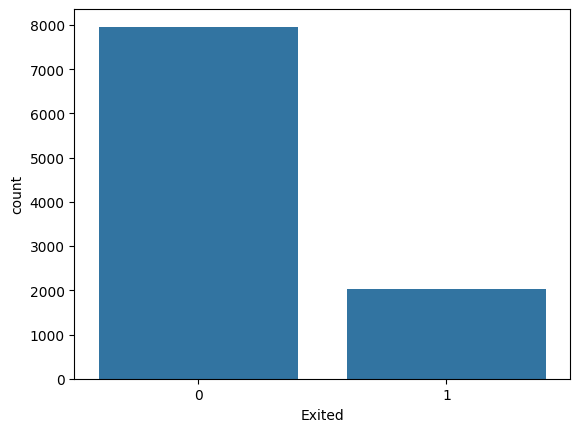

In [16]:
sns.countplot(Churn, x="Exited")

array([[<AxesSubplot: title={'center': 'RowNumber'}>,
        <AxesSubplot: title={'center': 'CustomerId'}>,
        <AxesSubplot: title={'center': 'CreditScore'}>,
        <AxesSubplot: title={'center': 'Geography_France'}>],
       [<AxesSubplot: title={'center': 'Geography_Germany'}>,
        <AxesSubplot: title={'center': 'Geography_Spain'}>,
        <AxesSubplot: title={'center': 'Gender'}>,
        <AxesSubplot: title={'center': 'Age'}>],
       [<AxesSubplot: title={'center': 'Tenure'}>,
        <AxesSubplot: title={'center': 'Balance'}>,
        <AxesSubplot: title={'center': 'NumOfProducts'}>,
        <AxesSubplot: title={'center': 'HasCrCard'}>],
       [<AxesSubplot: title={'center': 'IsActiveMember'}>,
        <AxesSubplot: title={'center': 'EstimatedSalary'}>,
        <AxesSubplot: >, <AxesSubplot: >]], dtype=object)

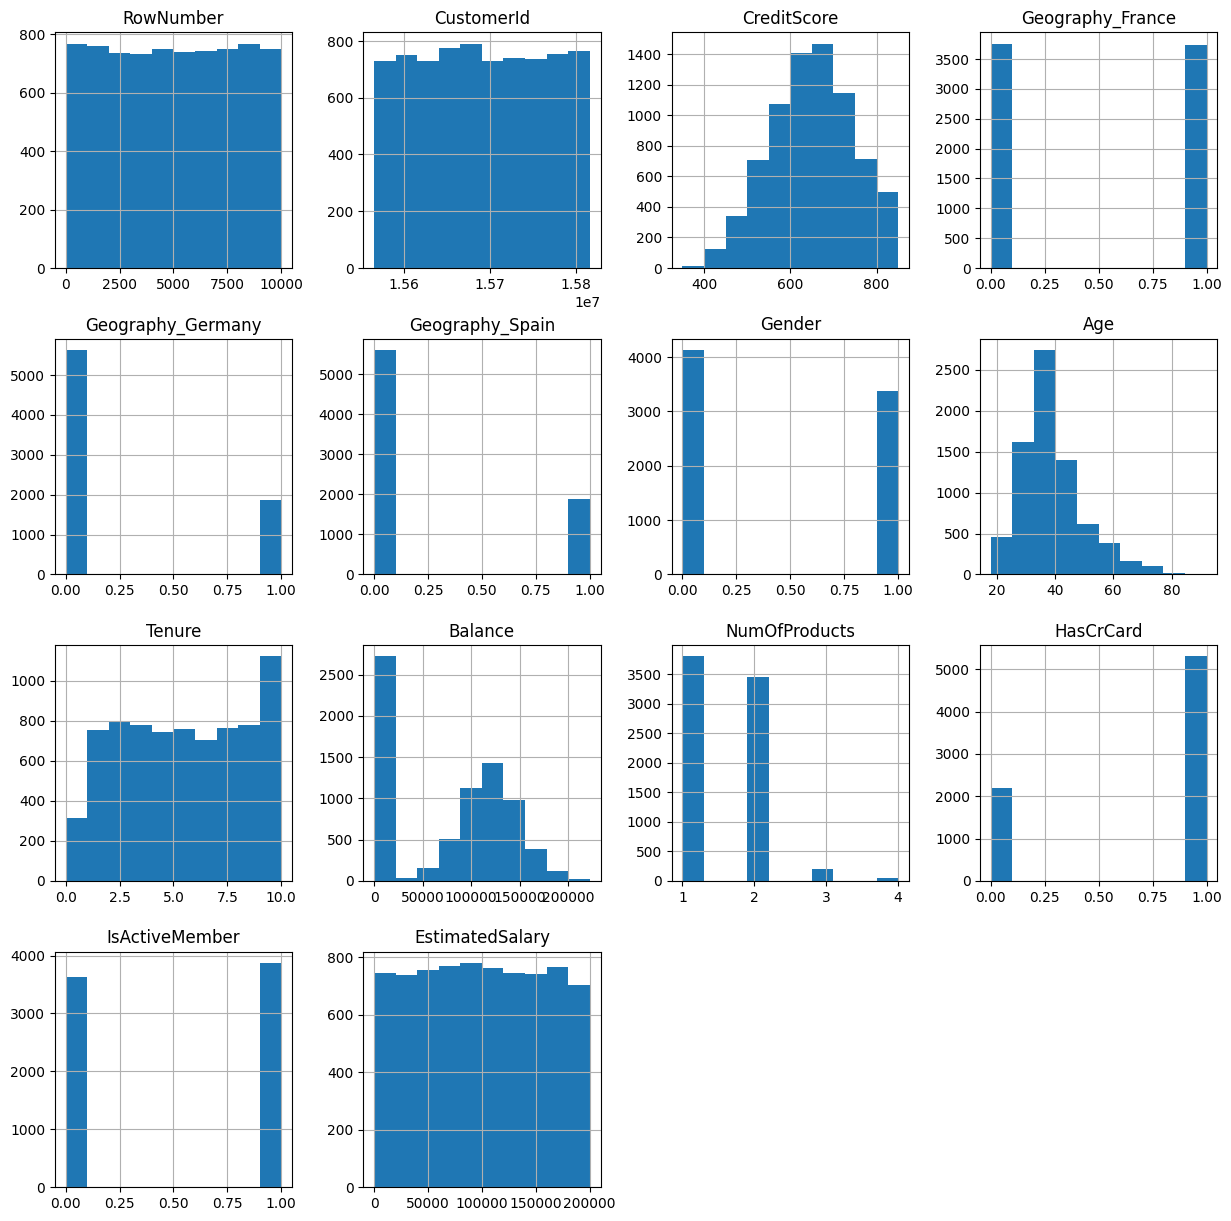

In [17]:
#  distribution of the features
X_train.hist(figsize=(15,15))
# the histogram helps see the distribution of the data 

array([[<AxesSubplot: title={'center': 'RowNumber'}>,
        <AxesSubplot: title={'center': 'CustomerId'}>,
        <AxesSubplot: title={'center': 'CreditScore'}>,
        <AxesSubplot: title={'center': 'Geography_France'}>],
       [<AxesSubplot: title={'center': 'Geography_Germany'}>,
        <AxesSubplot: title={'center': 'Geography_Spain'}>,
        <AxesSubplot: title={'center': 'Gender'}>,
        <AxesSubplot: title={'center': 'Age'}>],
       [<AxesSubplot: title={'center': 'Tenure'}>,
        <AxesSubplot: title={'center': 'Balance'}>,
        <AxesSubplot: title={'center': 'NumOfProducts'}>,
        <AxesSubplot: title={'center': 'HasCrCard'}>],
       [<AxesSubplot: title={'center': 'IsActiveMember'}>,
        <AxesSubplot: title={'center': 'EstimatedSalary'}>,
        <AxesSubplot: >, <AxesSubplot: >]], dtype=object)

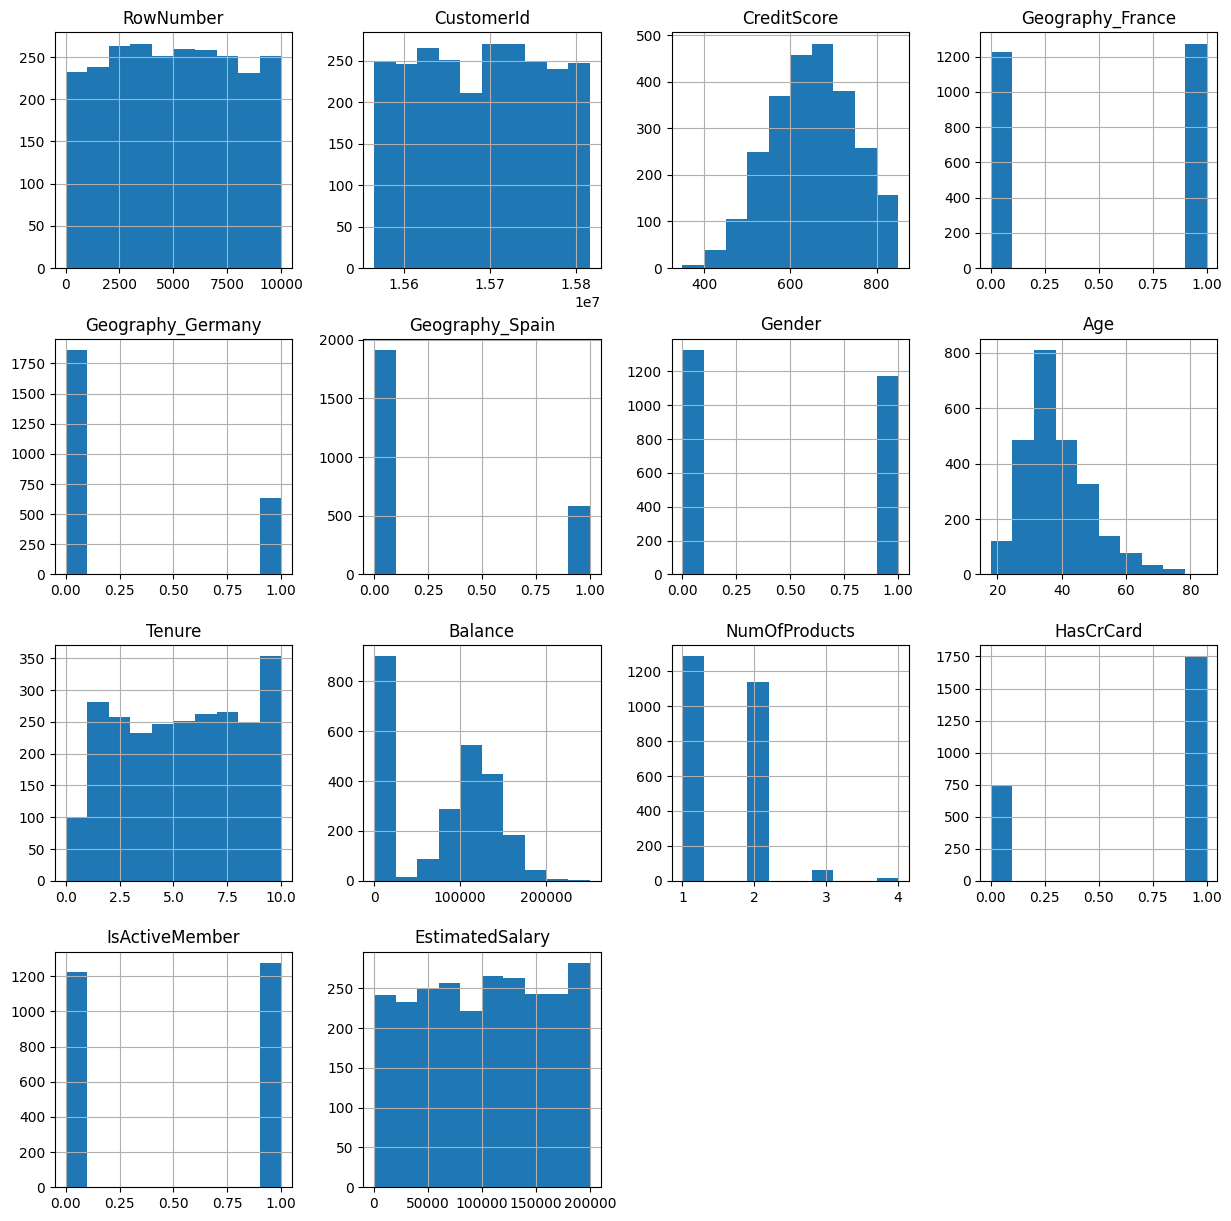

In [18]:
X_test.hist(figsize=(15,15))

# Balancing the data

<AxesSubplot: xlabel='Exited', ylabel='count'>

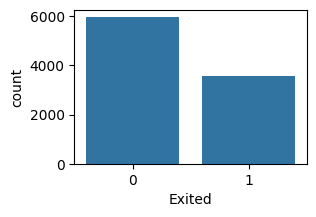

In [19]:

BALANCE_TARGET = True
SMOTE_BALANCE = True

if BALANCE_TARGET:
    if SMOTE_BALANCE:
        # use smote to balance the target variable
        smote = SMOTE(random_state=42, sampling_strategy=0.6) 
        X_train, y_train = smote.fit_resample(X_train, y_train)
    else:
        # undersample the majority class
        undersampler = RandomUnderSampler(random_state=42)
        X_train, y_train = undersampler.fit_resample(X_train, y_train)


plt.figure(figsize=(3, 2))
sns.countplot(y_train.to_frame(), x="Exited")

In [20]:
y_train.value_counts(normalize=True)

0    0.625013
1    0.374987
Name: Exited, dtype: float64

# Classification Portion

In [21]:
# Initialize XGBoost classifier
model = XGBClassifier(random_state=42, colsample_bytree=0.5) # To control cols use colsample_bytree, useful when doing one hot enc, redusing overfitting w one hot


In [22]:
# Define hyperparameter grid
param_grid = {
    'max_depth': [3, 5, 7], # Maximum depth of a tree. Increasing this value will make the model more complex and more likely to overfit.
    'gamma': [0, 0.1, 0.2], #  minimum loss reduction required to make a split. this makes the algorithm match expected results
    'subsample': [0.8, 1.0], # ration to train instead of the whole dataframe, controls the number of rows. 
    'learning_rate': [0.01, 0.1, 0.2], # Step size shrinkage used in update to prevent overfitting
    'n_estimators': [100, 200, 300] # number of trees. 
}
# if max_depth is 3, learning rate is 0.01 or 0.02, want the n_estimators to be higher. 

In [23]:
# Now you can define your custom scorer
f1_scorer = make_scorer(f1_score)
# harmonic mean between precision and recall.

In [24]:
# Perform grid search
grid_search = GridSearchCV(model, param_grid, scoring=f1_scorer, cv=5, verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 162 candidates, totalling 810 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.5, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, m...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             n_jobs=-1,
             param_grid={'gamma': [0, 0.1, 0.2],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200, 300],
                         'subsample': [0.8, 1.0]},
             scoring=make_scorer(f1_score, response_method='predict'),
             verbose=1)

# joblib

In [25]:
joblib.dump(grid_search, 'grid_search.pkl')


['grid_search.pkl']

In [26]:
joblib.dump(X_test, 'X_test.pkl')

['X_test.pkl']

In [27]:
# same for y_test 
joblib.dump(y_test, 'y_test.pkl')

['y_test.pkl']

info that i got from hyperparams in xgboost:

- https://www.kaggle.com/code/prashant111/a-guide-on-xgboost-hyperparameters-tuning 
- https://xgboost.readthedocs.io/en/latest/parameter.html#general-parameters